# Codice esempio per rappresentazione grafo diretto pesato

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
import numpy as np

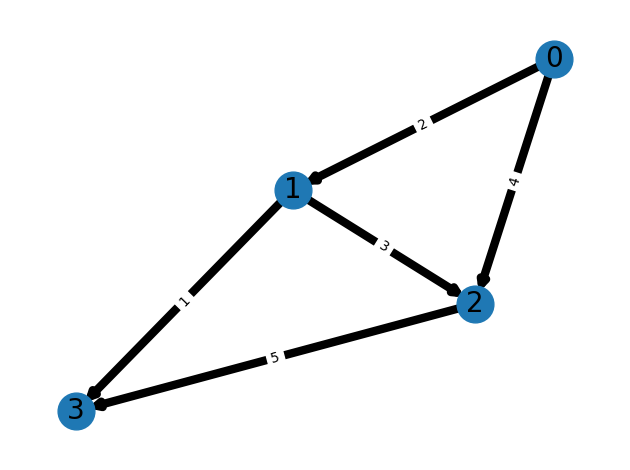

In [4]:
G = nx.DiGraph()

G.add_edge(0, 1, capacity=2)
G.add_edge(0, 2, capacity=4)
G.add_edge(1, 2, capacity=3)
G.add_edge(1, 3, capacity=1)
G.add_edge(2, 3, capacity=5)

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=6)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "capacity")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# Generazione grafo diretto con l'algoritmo Erdos-Renyi

In [3]:
def generate_file_from_graph(graph, filename, directed=False):
    with open(filename, "w") as file:
        file.write(f"n {len(graph.nodes)}\n")
        for edge in graph.edges:
            file.write(f"e {edge[0]} {edge[1]} {graph.edges[edge]['capacity']}\n")
            if not directed:
                file.write(f"e {edge[1]} {edge[0]} {graph.edges[edge]['capacity']}\n")

def draw_grap(G): 
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    edge_labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edges(G, pos, arrows=True, connectionstyle='arc3, rad = 0.1')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, connectionstyle='arc3, rad = 0.1')
    plt.show()

def generate_random_graph(n, p, min_capacity, max_capacity, directed=False):
    # G = nx.gnm_random_graph(n, m, directed=True, seed=7)
    G = nx.gnp_random_graph(n, p, directed=directed, seed=7)
    if not directed:
        if not nx.is_connected(G):
            print("Il grafo non è connesso, riprovare con un p più alto")
            return generate_random_graph(n, p, min_capacity, max_capacity)
    for edge in G.edges:
        capacity = random.randint(min_capacity, max_capacity)
        G.edges[edge]['capacity'] = capacity
    return G

def compute_mincut(graph, source, sink):
    mincut_value, partition = nx.minimum_cut(graph, source, sink)
    reachable, non_reachable = partition
    print(f"Valore del taglio minimo: {mincut_value}")
    print("Partizione:", partition)
    print("Nodi raggiungibili dal nodo 0:", reachable)
    print("Nodi non raggiungibili dal nodo 0:", non_reachable)

In [3]:
def generate_graph(N, min_capacity=1, max_capacity=10):
    # Creazione di un grafo vuoto diretto
    G = nx.DiGraph()

    # Aggiungi nodi al grafo
    G.add_nodes_from(range(N))

    # Genera un albero casuale per garantire che il grafo sia connesso
    tree = list(nx.random_tree(N).edges)
    
    # Aggiungi archi all'albero con capacità casuali, considerando entrambi i versi per simulare un grafo non diretto
    for i in range(N-1):
        u, v = tree[i]
        c = random.randint(min_capacity, max_capacity)  # Capacità casuale tra 1 e 10

        G.add_edge(u, v, capacity=c)
        G.add_edge(v, u, capacity=c)
    
    # Aggiungi archi aggiuntivi casuali per rendere il grafo più interessante
    #n_additional_edges = random.randint(N, N*(N-1)//2 - (N-1))
    #n_additional_edges = random.randint(N, min(N*2, N*(N-1)//2 - (N-1)))
    n_additional_edges = N*(N-1)//2 - (N-1)
    
    possible_edges = [(u, v) for u in range(N) for v in range(N) if u != v and not G.has_edge(u, v)]
    addiotional_edges = random.sample(possible_edges, n_additional_edges)
    
    for u, v in addiotional_edges:
        c = random.randint(min_capacity, max_capacity)
        G.add_edge(u, v, capacity=c)
        G.add_edge(v, u, capacity=c)
    
    return G

In [52]:
n = 40
p = 2*math.log(n)/n
min_capacity = 1
max_capacity = 10
filename = "../input_data/graphTestDir4.txt"
directed = True
newG = generate_random_graph(n, p, min_capacity, max_capacity, directed)
#newG = generate_graph(n, min_capacity, max_capacity)
#newG = generate_random_graph(n, p, min_capacity, max_capacity)
# draw_grap(newG)
generate_file_from_graph(newG, filename, directed)
compute_mincut(newG, 0, n-1)

Valore del taglio minimo: 56
Partizione: ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38}, {39})
Nodi raggiungibili dal nodo 0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38}
Nodi non raggiungibili dal nodo 0: {39}


In [17]:
nx.is_directed_acyclic_graph(newG)

False

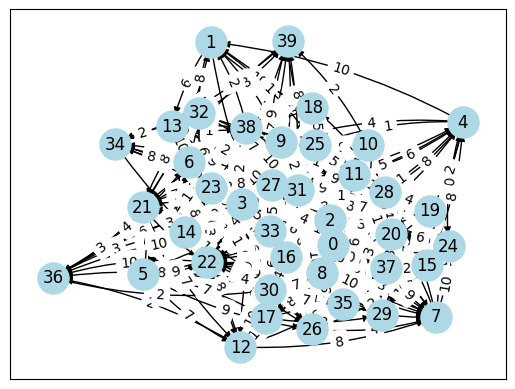

In [14]:
draw_grap(newG)

In [7]:
n = 100
p = 2*math.log(n)/n
min_capacity = 1
max_capacity = 10
filename = "../input_data/graphTestDir4.txt"
directed = True
newG = generate_random_graph(n, p, min_capacity, max_capacity, directed)

newGG = nx.DiGraph()
for edge in newG.edges:
    if edge[0] < edge[1]:
        newGG.add_edge(edge[0], edge[1], capacity=newG.edges[edge]['capacity'])

generate_file_from_graph(newGG, filename, directed)
compute_mincut(newGG, 0, n-1)

Valore del taglio minimo: 25
Partizione: ({0, 3, 4, 5, 7, 9, 10, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}, {1, 2, 99, 6, 8, 42, 11, 16, 18, 21})
Nodi raggiungibili dal nodo 0: {0, 3, 4, 5, 7, 9, 10, 12, 13, 14, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98}
Nodi non raggiungibili dal nodo 0: {1, 2, 99, 6, 8, 42, 11, 16, 18, 21}


In [8]:
nx.is_directed_acyclic_graph(newGG)

True

In [12]:
print(nx.is_weakly_connected(newGG))
print(nx.is_strongly_connected(newGG))

True
False
